# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [53]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset(Diabetes.csv)

In [54]:
df = pd.read_csv('C:/Users/simon/ml-project-supervised-learning/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [55]:
# Check if there are missing values:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Replacing Zero values:

In [56]:
#Replace Zeros with the mean of the columns except outcome column for the data to make sense:
mean_values = df.drop(columns='Outcome').mean()
for column in df.columns:
    if column != 'Outcome':
        df.loc[df[column] == 0, column] = mean_values[column]
print(df)


     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0       6.000000    148.0           72.0      35.000000   79.799479  33.6   
1       1.000000     85.0           66.0      29.000000   79.799479  26.6   
2       8.000000    183.0           64.0      20.536458   79.799479  23.3   
3       1.000000     89.0           66.0      23.000000   94.000000  28.1   
4       3.845052    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763    10.000000    101.0           76.0      48.000000  180.000000  32.9   
764     2.000000    122.0           70.0      27.000000   79.799479  36.8   
765     5.000000    121.0           72.0      23.000000  112.000000  26.2   
766     1.000000    126.0           60.0      20.536458   79.799479  30.1   
767     1.000000     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.62

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,4.400782,2.984162,1.000,2.000000,3.845052,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


-  From the above statistical summary the Average age(Mean) is **33.240885**

- Average Glucose without Diabetes =  **110.7053671875**
- Average Glucose with Diabetes =  **142.159660**

In [58]:
# Average Glucose of individuals with diabetes & without diabetes
Ave_glu_diabetes = df[df['Outcome'] == 1]['Glucose'].mean()
Ave_glu_negative = df[df['Outcome'] == 0]['Glucose'].mean()

# Average BMI of individuals with diabetes & without diabetes
Ave_bmi_diabetes = df[df['Outcome'] == 1]['BMI'].mean()
Ave_bmi_negative = df[df['Outcome'] == 0]['BMI'].mean()

print(" Average Glucose with Diabetes " "= ", Ave_glu_diabetes)
print(" Average Glucose without Diabetes " "= ", Ave_glu_negative)
print(" Average BMI with Diabetes " "= ", Ave_bmi_diabetes)
print(" Average BMI without Diabetes " "= ", Ave_bmi_negative)


 Average Glucose with Diabetes =  142.15966068097015
 Average Glucose without Diabetes =  110.7053671875
 Average BMI with Diabetes =  35.38128789645523
 Average BMI without Diabetes =  30.88006640625


- Distribution of each preditor variables:

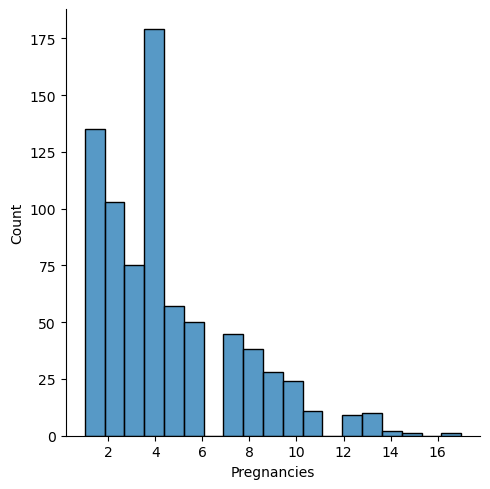

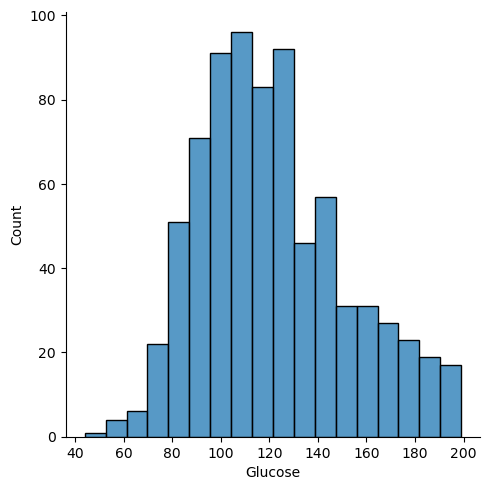

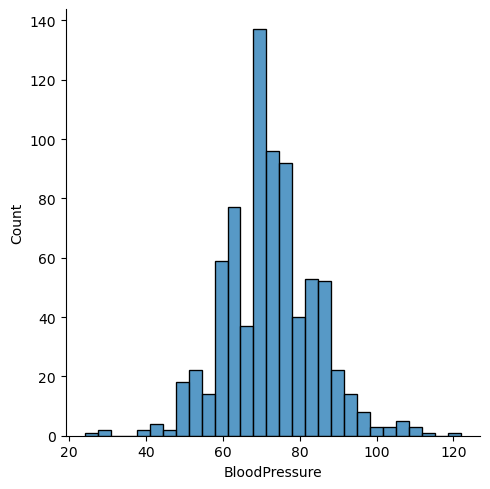

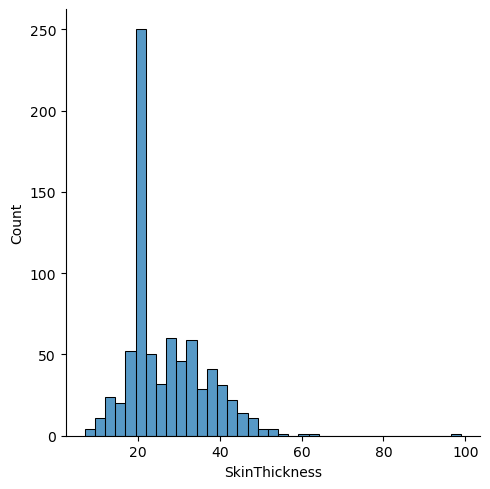

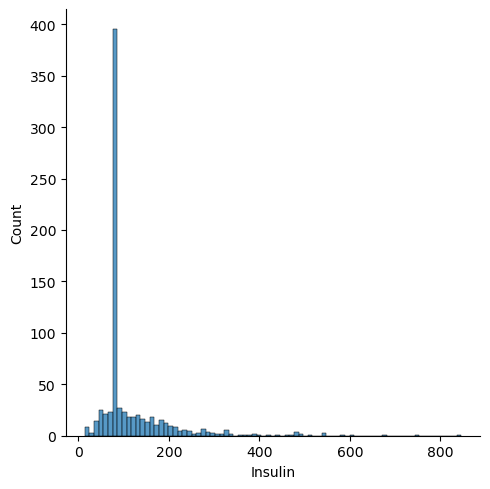

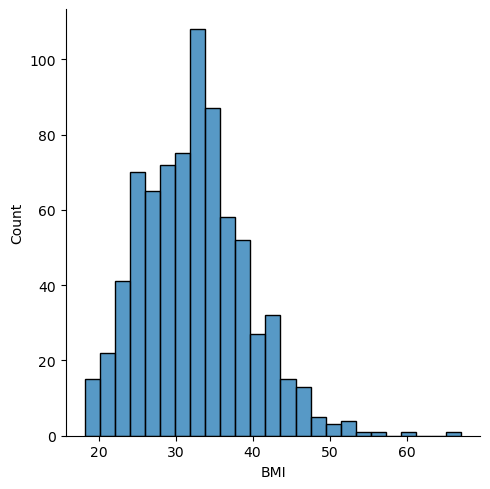

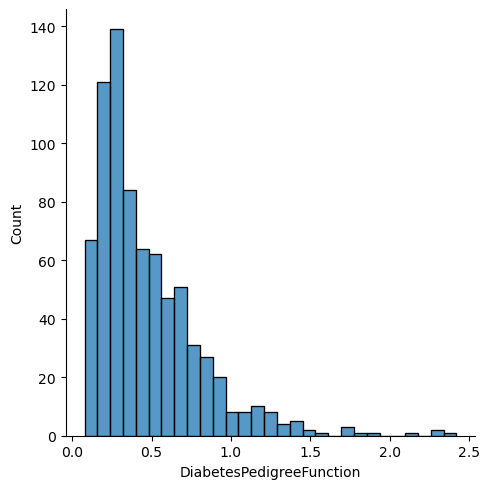

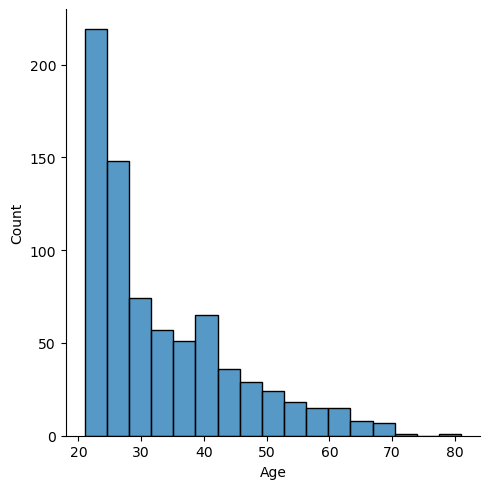

In [59]:
Pred_var = df.drop(columns=['Outcome'])

for column in Pred_var:
    sns.displot(Pred_var[column])


- From the above distribution we can see that **DiabetesPedigreeFunction and Age** are skewed.

- We can also notice an outlier in **Insulin & SkinThicknes**.

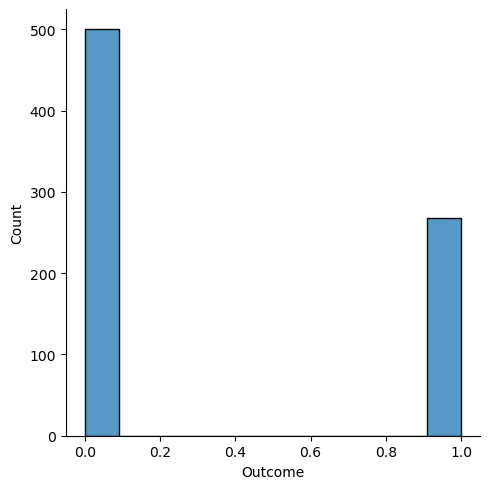

In [60]:
 sns.displot(df['Outcome'])

####  We can see that there is class imbalance in our `**outcome**` column which can signficantly affect our model.

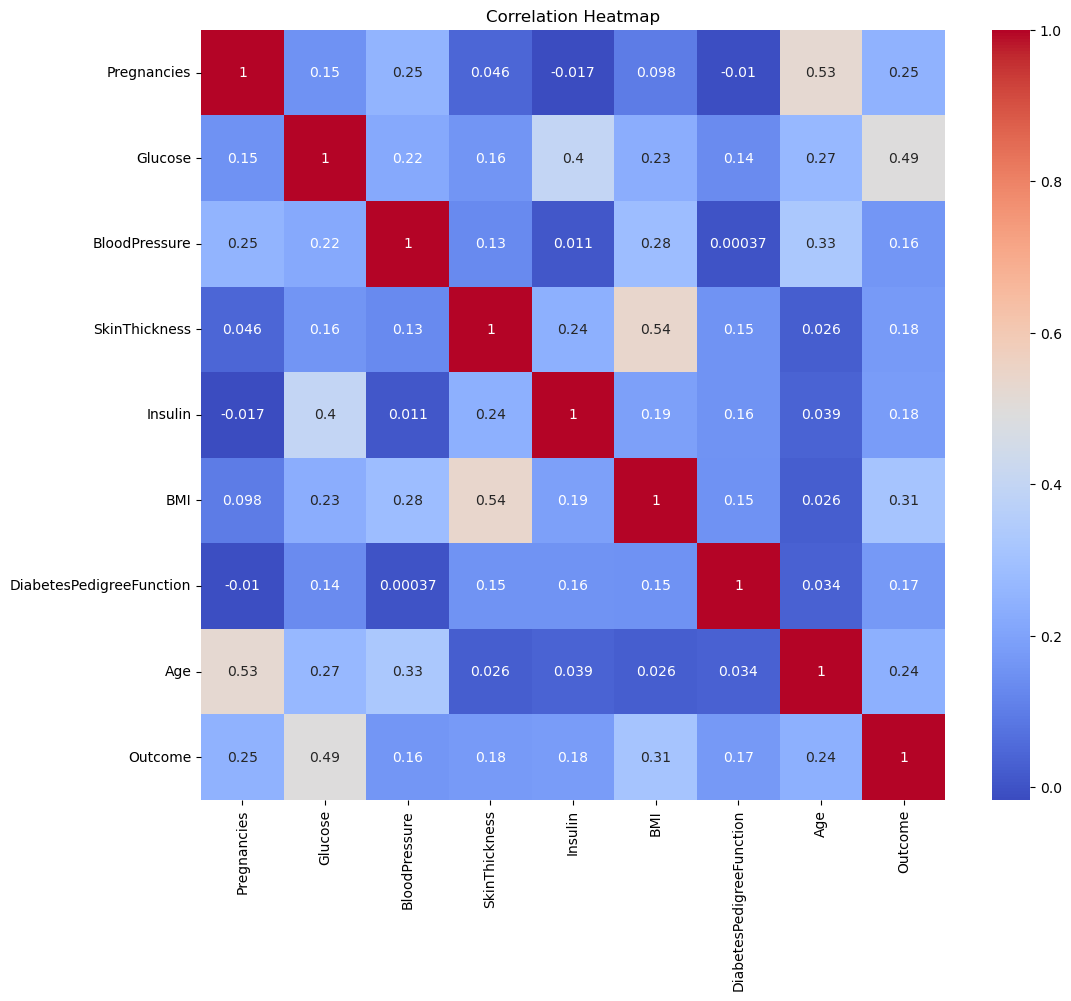

In [61]:
# Using a heatmap to observe the correlations between various predictor variables and also predictor & outcome.
corr_matrix = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

- Looking the heatmap the only correlations that we can consider are the correlations between **outcome**  and **Glucose(0.49)**, **Pregnancy** & **Age(0.53)**  and  also the correlation between **SkinThickness** & **BMI(0.54)**.

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

        - No missing values in the dataset
        - Outliers are not significant enough.

#### Handing imbalanced data:

In [62]:
# Counts of labesl in our outcome column show Class imbalance that can be misleading to our ML model:
value_counts = df['Outcome'].value_counts()
print(value_counts)

Outcome
0    500
1    268
Name: count, dtype: int64


### Scaling Dataset

In [63]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(Pred_var), columns=Pred_var.columns)
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.536251,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995
1,-1.140353,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672
2,1.206893,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584
3,-1.140353,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549
4,-0.186348,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.877535,-0.679954,0.309315,2.222711,0.659428,0.065376,-0.908682,2.532136
764,-0.805032,0.010468,-0.186224,0.040885,-0.417768,0.632988,-0.398282,-0.531023
765,0.200930,-0.022409,-0.021044,-0.374700,-0.071599,-0.909751,-0.685193,-0.275760
766,-1.140353,0.141977,-1.012121,-0.630654,-0.417768,-0.342140,-0.371101,1.170732


- Because of the zeros values in the dataset could not do logarithmic transformation(as part of feature engineering.

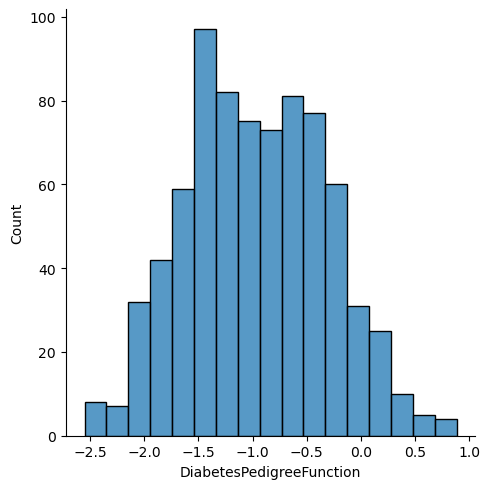

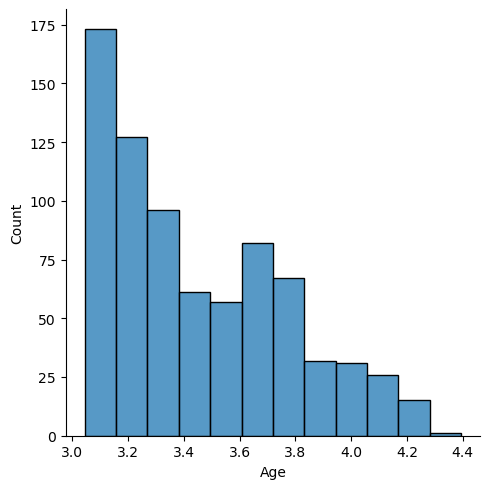

In [64]:
# Applying logarithmic trnsformation To improve the skewed distribution of Age and DiabetesPedigreeFuncion columns 

df[['DiabetesPedigreeFunction', 'Age']] = df[['DiabetesPedigreeFunction', 'Age']].apply(lambda x: np.log(x))

sns.displot(df['DiabetesPedigreeFunction'])
sns.displot(df['Age'])

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [65]:
# Suppress some warnings that sklearn is returning when a model doesn't perform well
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import warnings
warnings.filterwarnings('ignore')

In [66]:
result_df = pd.concat([df_scaled, df['Outcome']], axis=1)
result_df
value_counts = result_df['Outcome'].value_counts()
print(value_counts)

Outcome
0    500
1    268
Name: count, dtype: int64


In [67]:
#Defining x, y variables for building model
from sklearn.utils import shuffle

X, y = df_scaled, df['Outcome']

# It is good practice to shuffle your data, since it
# may be ordered in a particular way (e.g. increasing target)
X, y = shuffle(X, y, random_state=27)

print(f'Dataset has {X.shape[0]} data points and {X.shape[1]} features')

Dataset has 768 data points and 8 features


In [68]:
# Splitting data in to train/test
from sklearn.model_selection import train_test_split
train_ratio = 0.70
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, train_size=train_ratio) #shuffle is False because we shuffled above

print(f'{len(X_train)} training samples and {len(X_test)} test samples')



537 training samples and 231 test samples


#### Handling imbalance using Class weights before training our model:

In [69]:
#class weights for handling class imbalance in our binary classification problem. 

class_weights = {0: len(y_train) / (2 * (y_train == 0).sum()), 1: len(y_train) / (2 * (y_train == 1).sum())}

### Logistic Regression Model

In [70]:
from sklearn.linear_model import LogisticRegression
# Train our model
# logistic regression with no penalty term in the cost function.
log_model = LogisticRegression(class_weight = class_weights,penalty='none') 

log_model.fit(X_train, y_train)

#Make Prediction using the Test data:
log_pred = log_model.predict(X_test)



In [71]:
#Evaluating the Logistics Regression model Using accuracy, precision, recall & F1-score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy Metrics
accuracy = accuracy_score(y_test, log_pred)
print("Accuracy:", accuracy)

#Precision Metrics
precision = precision_score(y_test, log_pred)
print("Precision:", precision)

#F1- Metrics
f1 = f1_score(y_test, log_pred)
print("F1-Score:", f1)



Accuracy: 0.7229437229437229
Precision: 0.6136363636363636
F1-Score: 0.6279069767441862


### Random Forest Model

- `class_weight` is considered before training the model:

In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(class_weight = class_weights,random_state=0)

rfc_model.fit(X_train,y_train)

rfc_pred = rfc_model.predict(X_test)

In [73]:
# Evaluating the Random Forest Model Prediction:
# Accuracy Metrics
accuracy = accuracy_score(y_test, rfc_pred)
print("Accuracy:", accuracy)


#Precision Metrics
precision = precision_score(y_test, rfc_pred)
print("Precision:", precision)

#F1- Metrics
f1 = f1_score(y_test, rfc_pred)
print("F1-Score:", f1)

Accuracy: 0.7359307359307359
Precision: 0.6575342465753424
F1-Score: 0.6114649681528662


- Based on the evaluation Metrics above: Logistic regression model peformed slightly better on most metrics.

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- From the original dataframe the distribution for **DiabetesPedigreeFunction and Age** were skewed. Took action to improve the distribution to avoid misleading our model training.
- There was significant imbalance in our outcome variable`(**binary classificationi of ratio of approximately 35% to 65%**)` which can potentially lead our model to favour in to negative diabetes outcome). This is very dangerous outcome in this type of scenario as this will give false negative(meaning will give an outcome of negative diabetes to patients that actually have diabetes).
- We can also notice an outlier in **Insulin & SkinThickness**.
- Random Forest model has slightly better performance in the accuracy and precision metrics. 
- The model Generally **performed okay** with **model tunning** it can perfrom better.

- Generally speaking training a model to determine whether a patient is positive or negative is very sensitive and delicate matter if a hospital or medical center is to depend on ML model. This requires extremely quality data, thourough preprocessing and feature engineering. The prediction of the model should surpass the normall six sigma quality.